In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df= pd.read_csv('Automobile.csv')

In [3]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [4]:
len(df)

205

In [5]:
import numpy as np

#En esta parte se crea un diccionario de datos en el que se identifica que tipo de columna se tiene (categórica, numérica),
# cuántos valores únicos tiene cada columna, el número de valores faltantes y un ejemplo del valor posible de cada columna

# Analyze the columns of the DataFrame
data_analysis = {}
for column in df.columns:
    data_type = df[column].dtype
    if data_type in ["int64", "float64"]:
        classification = "numeric"
    else:
        classification = "categorical"

    # Convert numpy types to native Python types
    example_value = df[column].iloc[0]
    if isinstance(example_value, (np.int64, np.float64, np.int32)):
        example_value = int(example_value)

    data_analysis[column] = {
        "data_type": str(data_type),
        "unique_values": int(df[column].nunique()),
        "missing_values": int(df[column].isnull().sum()),
        "example_value": example_value,
        "classification": classification
    }

# Provide a data example for each column
data_example = df.iloc[0].astype(str).to_dict()

# Create a dictionary with the analysis and data example
analysis_dict = {
    "data_analysis": data_analysis,
    "data_example": data_example
}

#analysis_dict

In [6]:
df_dict= pd.DataFrame(analysis_dict['data_analysis']).T
df_dict

,data_type,unique_values,missing_values,example_value,classification
symboling,int64,6,0,3,numeric
normalized-losses,object,52,0,?,categorical
make,object,22,0,alfa-romero,categorical
fuel-type,object,2,0,gas,categorical
aspiration,object,2,0,std,categorical
number-of-doors,object,3,0,two,categorical
body-style,object,5,0,convertible,categorical
drive-wheels,object,3,0,rwd,categorical
engine-location,object,2,0,front,categorical
wheel-base,float64,53,0,88,numeric


In [7]:
categorical= df_dict.loc[df_dict.classification=='categorical']
categorical

,data_type,unique_values,missing_values,example_value,classification
normalized-losses,object,52,0,?,categorical
make,object,22,0,alfa-romero,categorical
fuel-type,object,2,0,gas,categorical
aspiration,object,2,0,std,categorical
number-of-doors,object,3,0,two,categorical
body-style,object,5,0,convertible,categorical
drive-wheels,object,3,0,rwd,categorical
engine-location,object,2,0,front,categorical
engine-type,object,7,0,dohc,categorical
num-of-cylinders,object,7,0,four,categorical


In [8]:
# Se identificó que los valores faltantes están representados por un signo de interrogación '?', por lo que se sustituye por un 
# valor 'Nulo'

df.replace('?', np.nan, inplace=True)

In [9]:
#Se vuelve a crear un diccionario de datos para observar los datos faltantes por columna

# Analyze the columns of the DataFrame
data_analysis = {}
for column in df.columns:
    data_type = df[column].dtype
    if data_type in ["int64", "float64"]:
        classification = "numeric"
    else:
        classification = "categorical"


    data_analysis[column] = {
        "data_type": str(data_type),
        "unique_values": int(df[column].nunique()),
        "missing_values": int(df[column].isnull().sum()),
        "mode_value": df[column].mode().iloc[0],
        "classification": classification
    }

# Provide a data example for each column
data_example = df.iloc[0].astype(str).to_dict()

# Create a dictionary with the analysis and data example
analysis_dict = {
    "data_analysis": data_analysis,
    "data_example": data_example
}

In [10]:
# Se añade una columna al diccionario para obtener el % faltante cada columna y se observa que son pocos los datos faltantes para
# cada columna

df_dict= pd.DataFrame(analysis_dict['data_analysis']).T
df_dict['% Faltantes']=  (df_dict['missing_values']/len(df))*100
df_dict

,data_type,unique_values,missing_values,mode_value,classification,% Faltantes
symboling,int64,6,0,0,numeric,0.0
normalized-losses,object,51,41,161,categorical,20.0
make,object,22,0,toyota,categorical,0.0
fuel-type,object,2,0,gas,categorical,0.0
aspiration,object,2,0,std,categorical,0.0
number-of-doors,object,2,2,four,categorical,0.97561
body-style,object,5,0,sedan,categorical,0.0
drive-wheels,object,3,0,fwd,categorical,0.0
engine-location,object,2,0,front,categorical,0.0
wheel-base,float64,53,0,94.5,numeric,0.0


In [11]:
# Debido a que los datos faltantes se tenian como '?', algunas columnas númericas estaban como categoricas, por lo que se
# convierten a numéricas

df.price= df.price.astype(float)
df['peak-rpm']= df['peak-rpm'].astype(float)
df.horsepower= df.horsepower.astype(float)
df.stroke= df.stroke.astype(float)
df.bore= df.bore.astype(float)
df['normalized-losses']= df['normalized-losses'].astype(float)

In [12]:
### Se hace una imputación de valores para reemplazar los valores nulos, utilizando la media para las columnas numéricas y la
## moda para columnas categóricas

df['normalized-losses']= df['normalized-losses'].fillna(round(df['normalized-losses'].mean()))
df['number-of-doors']= df['number-of-doors'].fillna('four')
df['bore']= df['bore'].fillna(df['bore'].mean())
df['stroke']= df['stroke'].fillna(df['stroke'].mean())
df['horsepower']= df['horsepower'].fillna(round(df['horsepower'].mean()))
df['peak-rpm']= df['peak-rpm'].fillna(round(df['peak-rpm'].mean()))
df['price']= df['price'].fillna(round(df['price'].mean()))

In [13]:
### En este paso, se transforman las columnas categóricas para asignarle un valor numérico a cada atributo de su respectiva columna,
### para la gran mayoría se le asignó un valor tomando en cuenta el criterio humano, pues se consideró el signficado de cada
### atributo, a excepción de 'body-style' que se tranformó con labelEncoder, que le asigna valores numércios arbitrarios, pues 
### son muchos atributos


label_encoder = LabelEncoder()

#df['number-of-doors']= label_encoder.fit_transform(df['number-of-doors'])
df['number-of-doors']= df['number-of-doors'].replace(['two','four'],[0,1])
df['fuel-type']= df['fuel-type'].replace(['gas','diesel'],[1,0])
df['aspiration']= df['aspiration'].replace(['turbo','std'],[1,0])
df['body-style']= label_encoder.fit_transform(df['body-style'])
df['drive-wheels']= df['drive-wheels'].replace(['rwd','fwd','4wd'],[1,0,2])
df['engine-location']= df['engine-location'].replace(['front','rear'],[0,1])
#df['engine-type']= label_encoder.fit_transform(df['engine-type'])
df['num-of-cylinders']= df['num-of-cylinders'].replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],[4,6,5,3,12,2,8])
#df['fuel-system']= label_encoder.fit_transform(df['fuel-system'])

In [14]:
df.shape

(205, 26)

In [15]:
df_pp= df

In [16]:
### Para estas columnas, se obtuvieron los valores dummies, pues se considero importante tomar que tipo de ingeniería, sistema
### de combustible y qué marca hizo el carro, pues por el tipo de df es importante saber si tiene o no cada atributo

one_hot = pd.get_dummies(df, columns=['engine-type','fuel-system', 'make'])

In [17]:
one_hot

,symboling,normalized-losses,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,122.0,1,0,0,0,1,0,88.6,168.8,64.1,48.8,2548,4,130,3.470000,2.680000,9.00,111.0,5000.0,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,122.0,1,0,0,0,1,0,88.6,168.8,64.1,48.8,2548,4,130,3.470000,2.680000,9.00,111.0,5000.0,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,122.0,1,0,0,2,1,0,94.5,171.2,65.5,52.4,2823,6,152,2.680000,3.470000,9.00,154.0,5000.0,19,26,16500.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,164.0,1,0,1,3,0,0,99.8,176.6,66.2,54.3,2337,4,109,3.190000,3.400000,10.00,102.0,5500.0,24,30,13950.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,164.0,1,0,1,3,2,0,99.4,176.6,66.4,54.3,2824,5,136,3.190000,3.400000,8.00,115.0,5500.0,18,22,17450.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,122.0,1,0,0,3,0,0,99.8,177.3,66.3,53.1,2507,5,136,3.190000,3.400000,8.50,110.0,5500.0,19,25,15250.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,158.0,1,0,1,3,0,0,105.8,192.7,71.4,55.7,2844,5,136,3.190000,3.400000,8.50,110.0,5500.0,19,25,17710.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,122.0,1,0,1,4,0,0,105.8,192.7,71.4,55.7,2954,5,136,3.190000,3.400000,8.50,110.0,5500.0,19,25,18920.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,158.0,1,1,1,3,0,0,105.8,192.7,71.4,55.9,3086,5,131,3.130000,3.400000,8.30,140.0,5500.0,17,20,23875.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,122.0,1,1,0,2,2,0,99.5,178.2,67.9,52.0,3053,5,131,3.130000,3.400000,7.00,160.0,5500.0,16,22,13207.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
#Se imprime el resumen estadístico de cada columna

df.describe()

,symboling,normalized-losses,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,0.902439,0.180488,0.565854,2.614634,0.458537,0.014634,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329751,3.255423,10.142537,104.253659,5125.365854,25.219512,30.751220,13207.126829
std,1.245307,31.681008,0.297446,0.385535,0.496858,0.859081,0.581148,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.519219,476.979095,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,1.000000,0.000000,1.000000,3.000000,1.000000,0.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [19]:
### Debido a la variabilidad y a la diferencia de magnitud entre columnas, se consideró importante normalizar las siguiente columnas 

#normalizar= ['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size',
#            'horsepower','peak-rpm', 'city-mpg', 'highway-mpg']

#for column in normalizar:
#    one_hot[column]= stats.zscore(one_hot[column])

In [20]:
one_hot.describe()

,symboling,normalized-losses,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,0.902439,0.180488,0.565854,2.614634,0.458537,0.014634,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329751,3.255423,10.142537,104.253659,5125.365854,25.219512,30.751220,13207.126829,0.058537,0.004878,0.058537,0.721951,0.073171,0.063415,0.019512,0.053659,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878,0.014634,0.034146,0.039024,0.014634,0.043902,0.063415,0.019512,0.014634,0.082927,0.039024,0.004878,0.063415,0.087805,0.053659,0.034146,0.024390,0.009756,0.029268,0.058537,0.156098,0.058537,0.053659
std,1.245307,31.681008,0.297446,0.385535,0.496858,0.859081,0.581148,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.519219,476.979095,6.542142,6.886443,7868.768212,0.235330,0.069843,0.235330,0.449134,0.261054,0.244304,0.138655,0.225894,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843,0.120377,0.182050,0.194127,0.120377,0.205380,0.244304,0.138655,0.120377,0.276447,0.194127,0.069843,0.244304,0.283704,0.225894,0.182050,0.154635,0.098531,0.168970,0.235330,0.363836,0.235330,0.225894
min,-2.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,122.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,

In [21]:
one_hot.drop(columns='price', inplace=True)
one_hot['price']= df['price']

In [22]:
len(one_hot.columns)

60

In [23]:
X= one_hot.drop(columns='price')

In [24]:
y= one_hot.price

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
transformed_X=scaler.fit_transform(X)

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=0)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(143, 59) (62, 59) (143,) (62,)


In [41]:
model = KNeighborsRegressor(3, weights='distance', metric='manhattan')  
model.fit(X_train,y_train)  
predictions = model.predict(X_test)


print('Puntaje entrenamiento: {}\n'.format(model.score(X_train,y_train)))
print('Puntaje Test: {}\n'.format(model.score(X_test,y_test)))
print('MAE',mean_absolute_error(y_test, predictions)) #mean absolute error
print('MSE',mean_squared_error(y_test, predictions))  #mean squared error

Puntaje entrenamiento: 0.9991327055271726

Puntaje Test: 0.7992532466824515

MAE 2055.638259727912
MSE 12062056.893167699


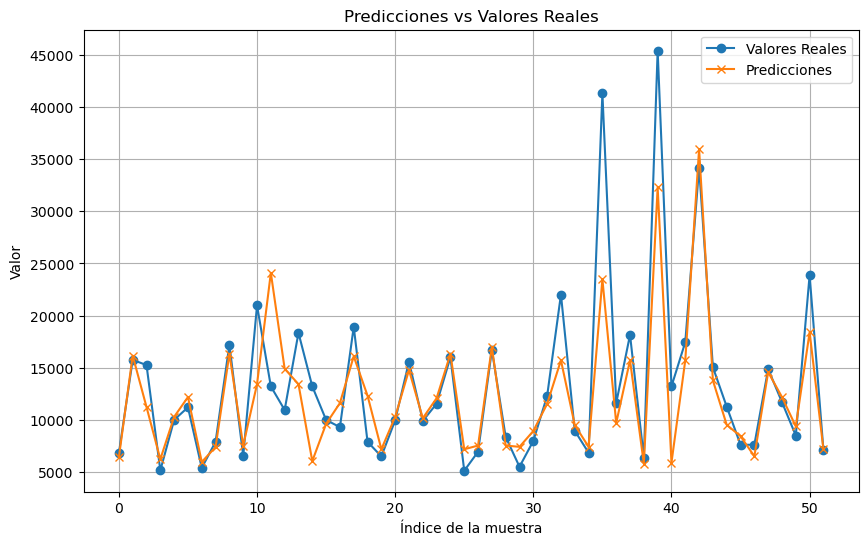

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que 'y_test' contiene los valores reales y 'y_pred' contiene las predicciones de tu modelo.
# Asegúrate de que ambas listas tengan la misma longitud.

# Crear una secuencia de índices en orden secuencial
x_values = np.arange(len(y_test))

# Crear una figura y ejes
plt.figure(figsize=(10, 6))
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Índice de la muestra')
plt.ylabel('Valor')

# Dibujar las líneas de predicciones y valores reales
plt.plot(x_values, y_test, label='Valores Reales', marker='o', linestyle='-')
plt.plot(x_values, predictions, label='Predicciones', marker='x', linestyle='-')

# Mostrar una leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

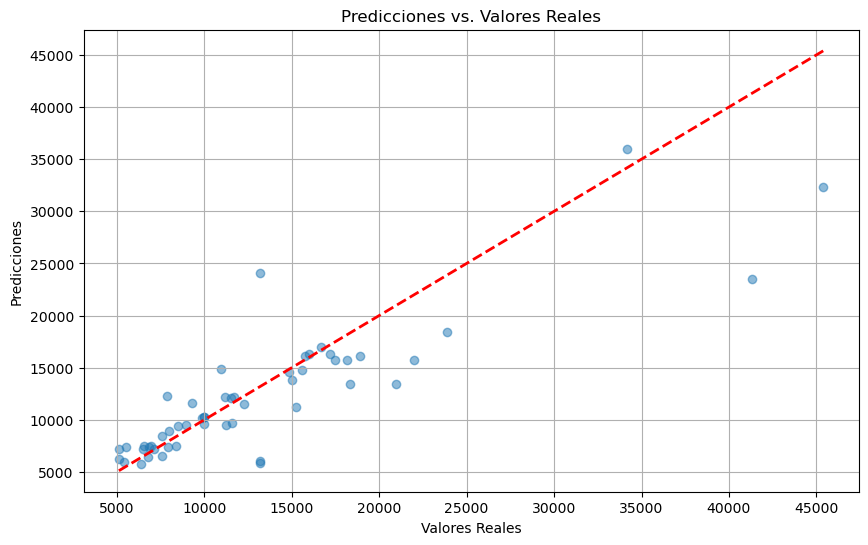

In [30]:
### Comparación entre 

import matplotlib.pyplot as plt

# Crear un gráfico de dispersión para comparar predicciones vs. valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)  # Crear el gráfico de dispersión
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)

# Dibujar una línea diagonal para mostrar el punto de referencia (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

# Mostrar el gráfico
plt.show()

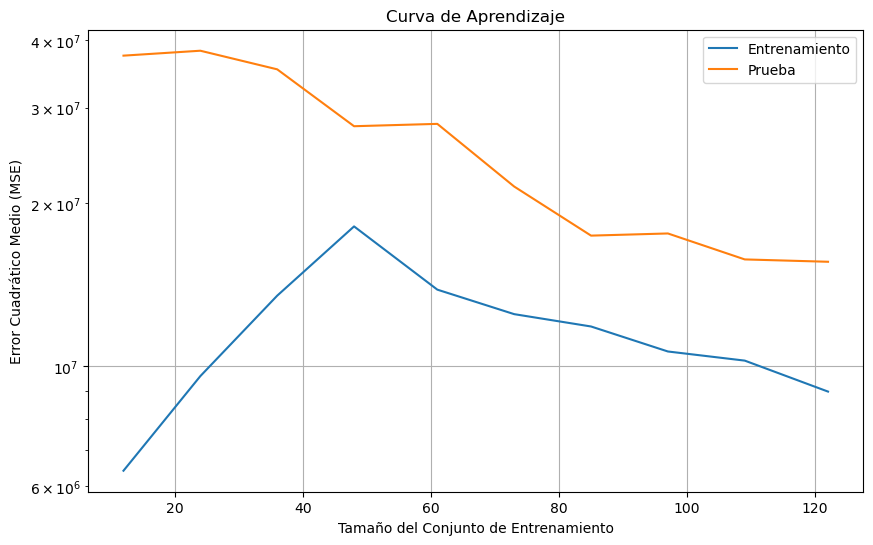

In [31]:
### Visualización de la curva de aprendizaje del test y del train
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title('Curva de Aprendizaje')
    plt.xlabel('Tamaño del Conjunto de Entrenamiento')
    plt.ylabel('Error Cuadrático Medio (MSE)')
    plt.grid()

    plt.yscale('log') 
    
    plt.plot(train_sizes, train_scores_mean, label='Entrenamiento')
    plt.plot(train_sizes, test_scores_mean, label='Prueba')

    plt.legend()
    plt.show()

# Suponiendo que 'model' es tu modelo ya entrenado y 'X' y 'y' son tus datos de entrenamiento
plot_learning_curve(model, X_train, y_train)
